In [14]:
import pandas as pd
import seaborn as sns
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt 

%matplotlib inline

#import missingno as msno
#from textwrap import wrap

In [120]:
transaction_df = pd.read_csv('/Users/yu/Desktop/project/transaction_df.csv')
cusdemo_df = pd.read_csv('/Users/yu/Desktop/project/cusdemo_df.csv')
cusadd_df = pd.read_csv('/Users/yu/Desktop/project/cusadd_df.csv')

In [121]:
dfs = [transaction_df,cusdemo_df, cusadd_df]
bike_df = reduce(lambda left,right:pd.merge(left,right,how='outer', on='customer_id'),dfs)
bike_df.head()
#outer->keep everything; inner->only matching customer_ids kept

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1.0,2.0,2950,2024-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,11.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,11065.0,1.0,2950,2024-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,11.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
2,18923.0,62.0,2950,2024-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,11.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
3,2.0,3.0,3120,2024-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,11.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
4,6862.0,4.0,3120,2024-05-10,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,11.0,4 Shopko Circle,2196.0,NSW,Australia,5.0


In [122]:
bike_df.info()
#do I need to make entries same?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20510 entries, 0 to 20509
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       20000 non-null  float64
 1   product_id                           20000 non-null  float64
 2   customer_id                          20510 non-null  int64  
 3   transaction_date                     20000 non-null  object 
 4   online_order                         20000 non-null  float64
 5   order_status                         20000 non-null  object 
 6   brand                                20000 non-null  object 
 7   product_line                         20000 non-null  object 
 8   product_class                        20000 non-null  object 
 9   product_size                         20000 non-null  object 
 10  list_price                           20000 non-null  float64
 11  standard_cost               

In [24]:
bike_df.duplicated().any()

False

RFM MODEL
#RFM model group by id max date rank ,  group by id count rank, group by id sum profit rank-> add them divid 3 -> high value customer / medium /low add them to dataset

In [32]:
bike_df['transaction_date'] = pd.to_datetime(bike_df['transaction_date'])

In [123]:
recency = bike_df.groupby('customer_id')['transaction_date'].max().reset_index()
recency['recency_rank'] =recency['transaction_date'].rank(method='first', ascending=False) # from big to small

In [124]:
frequency = bike_df.groupby('customer_id')['transaction_id'].count().reset_index()
frequency['frequency_rank'] =frequency['transaction_id'].rank(method='first', ascending=True) #from small to big 

In [125]:
monetary = bike_df.groupby('customer_id')['profit'].sum().reset_index()
monetary['monetary_rank'] =monetary['profit'].rank(method='first', ascending=True) #small to big

In [126]:
#Calculate average score
rfm['Average_score'] = (rfm['recency_rank'] + rfm['frequency_rank'] + rfm['monetary_rank']) / 3

print(rfm)

      customer_id  recency_rank  frequency_rank  monetary_rank  Average_score  \
0               1         351.0          3898.0         2352.0    2200.333333   
1               2        2023.0           762.0         1684.0    1489.666667   
2               3        2804.0          3268.0         2598.0    2890.000000   
3               4        3357.0           560.0          560.0    1492.333333   
4               5         788.0          2223.0         1833.0    1614.666667   
...           ...           ...             ...            ...            ...   
3999         4000           NaN           507.0          507.0            NaN   
4000         4001           NaN           508.0          508.0            NaN   
4001         4002           NaN           509.0          509.0            NaN   
4002         4003           NaN           510.0          510.0            NaN   
4003         5034        3305.0          1122.0          574.0    1667.000000   

                  Segment  

<Axes: >

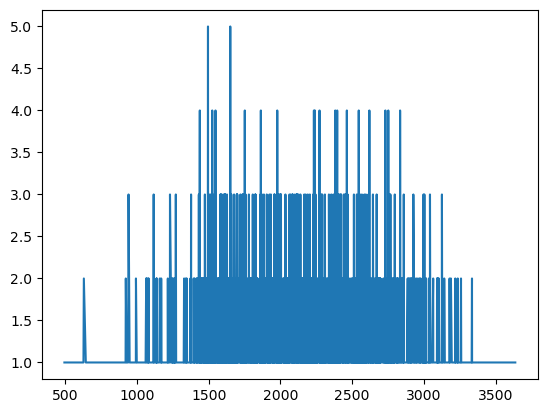

In [63]:
rfm.Average_score.value_counts().sort_index().plot()

In [92]:
rfm['Segment'] = pd.cut(rfm['Average_score'],
                        bins=[500,1500,2500,3500],
                        labels = ['High Value Customer', 'Middle Customer', 'Low Value Customer'])
#rfm['Segment'] = pd.qcut(rfm['Average_score'], q=3,labels = ['High Value Customer', 'Middle Customer', 'Low Value Customer'])

In [93]:
print(rfm['Segment'].value_counts())

Middle Customer        1889
Low Value Customer      971
High Value Customer     624
Name: Segment, dtype: int64


In [95]:
high_value_customers = rfm[rfm['Segment'] == 'High Value Customer']
high_value_customers

,customer_id,recency_rank,frequency_rank,monetary_rank,Average_score,Segment
1,2,2023.0,762.0,1684.0,1489.666667,High Value Customer
3,4,3357.0,560.0,560.0,1492.333333,High Value Customer
16,17,1.0,1624.0,1482.0,1035.666667,High Value Customer
29,30,538.0,766.0,2036.0,1113.333333,High Value Customer
35,36,3189.0,561.0,554.0,1434.666667,High Value Customer
...,...,...,...,...,...,...
3485,3486,489.0,1618.0,2318.0,1475.000000,High Value Customer
3486,3487,537.0,1119.0,1369.0,1008.333333,High Value Customer
3487,3488,885.0,761.0,754.0,800.000000,High Value Customer
3493,3494,256.0,1620.0,2142.0,1339.333333,High Value Customer


In [101]:
low_value_customers = rfm[rfm['Segment'] == 'Low Value Customer']
low_value_customers

,customer_id,recency_rank,frequency_rank,monetary_rank,Average_score,Segment
2,3,2804.0,3268.0,2598.0,2890.000000,Low Value Customer
7,8,1963.0,3786.0,3907.0,3218.666667,Low Value Customer
12,13,1710.0,2793.0,3185.0,2562.666667,Low Value Customer
17,18,2046.0,2794.0,2728.0,2522.666667,Low Value Customer
21,22,2649.0,3269.0,3551.0,3156.333333,Low Value Customer
...,...,...,...,...,...,...
3483,3484,1001.0,3265.0,3747.0,2671.000000,Low Value Customer
3488,3489,2878.0,2788.0,2047.0,2571.000000,Low Value Customer
3492,3493,2719.0,2789.0,2859.0,2789.000000,Low Value Customer
3497,3498,2672.0,2790.0,2440.0,2634.000000,Low Value Customer


In [128]:
bike_df = bike_df.merge(rfm[['customer_id','Average_score','Segment']],on='customer_id', how='left')

In [155]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20510 entries, 0 to 20509
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       20000 non-null  float64 
 1   product_id                           20000 non-null  float64 
 2   customer_id                          20510 non-null  int64   
 3   transaction_date                     20000 non-null  object  
 4   online_order                         20000 non-null  float64 
 5   order_status                         20000 non-null  object  
 6   brand                                20000 non-null  object  
 7   product_line                         20000 non-null  object  
 8   product_class                        20000 non-null  object  
 9   product_size                         20000 non-null  object  
 10  list_price                           20000 non-null  float64 
 11  standard_cost  

In [156]:
bike_df.to_csv('bike_df.csv',index=False)

In [137]:
high_value_bike_df = bike_df[bike_df['Segment'] == 'High Value Customer']
high_value_bike_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Average_score,Segment
0,1.0,2.0,2950,2024-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,11.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,1403.666667,High Value Customer
1,11065.0,1.0,2950,2024-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,11.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,1403.666667,High Value Customer
2,18923.0,62.0,2950,2024-04-26,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,11.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,1403.666667,High Value Customer
204,30.0,91.0,1173,2024-03-15,0.0,Approved,WeareA2B,Standard,low,medium,...,N,No,11.0,71 Cherokee Hill,2127.0,NSW,Australia,7.0,1447.000000,High Value Customer
205,1065.0,0.0,1173,2024-01-09,1.0,Approved,OHM Cycles,Standard,high,medium,...,N,No,11.0,71 Cherokee Hill,2127.0,NSW,Australia,7.0,1447.000000,High Value Customer


In [158]:
high_value_bike_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,CohortIndex,past_3_years_bike_related_purchases,age,tenure,postcode,property_valuation,Average_score
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.0,2209.0,2209.000000,2209.000000,2209.000000
mean,9974.176098,45.448167,1611.564056,0.511996,982.024436,569.316632,409.509624,4.944319,48.783612,47.0,11.0,2948.749660,7.573110,1230.999849
std,5737.230961,31.562613,1006.354178,0.499969,572.933438,415.676327,408.852460,3.728935,28.307500,0.0,0.0,859.286831,2.784569,216.537270
min,1.000000,0.000000,2.000000,0.000000,12.010000,7.210000,4.800000,1.000000,0.000000,47.0,11.0,2000.000000,1.000000,506.333333
25%,5228.000000,17.000000,755.000000,0.000000,533.510000,215.140000,110.560000,1.000000,23.000000,47.0,11.0,2193.000000,6.000000,1103.666667
50%,9920.000000,45.000000,1504.000000,1.000000,1036.590000,507.580000,198.290000,4.000000,48.000000,47.0,11.0,2749.000000,8.000000,1275.333333
75%,15009.000000,73.000000,2460.000000,1.000000,1415.010000,818.010000,641.640000,8.000000,72.000000,47.0,11.0,3752.000000,10.000000,1411.666667
max,19978.000000,100.000000,3497.000000,1.000000,2091.470000,1759.850000,1702.550000,12.000000,99.000000,47.0,11.0,4879.000000,12.000000,1499.666667


In [141]:
high_value_bike_df.to_csv('high_value_bike_df.csv',index=False)

In [143]:
high_value_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       2209 non-null   float64 
 1   product_id                           2209 non-null   float64 
 2   customer_id                          2209 non-null   int64   
 3   transaction_date                     2209 non-null   object  
 4   online_order                         2209 non-null   float64 
 5   order_status                         2209 non-null   object  
 6   brand                                2209 non-null   object  
 7   product_line                         2209 non-null   object  
 8   product_class                        2209 non-null   object  
 9   product_size                         2209 non-null   object  
 10  list_price                           2209 non-null   float64 
 11  standard_cost   

In [144]:
low_value_bike_df = bike_df[bike_df['Segment'] == 'Low Value Customer']
low_value_bike_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Average_score,Segment
3,2.0,3.0,3120,2024-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,11.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,2844.333333,Low Value Customer
4,6862.0,4.0,3120,2024-05-10,0.0,Approved,Giant Bicycles,Standard,high,medium,...,N,Yes,11.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,2844.333333,Low Value Customer
5,9155.0,91.0,3120,2024-10-30,1.0,Approved,Solex,Standard,medium,medium,...,N,Yes,11.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,2844.333333,Low Value Customer
6,11409.0,95.0,3120,2024-01-30,0.0,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,11.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,2844.333333,Low Value Customer
7,13066.0,38.0,3120,2024-01-20,1.0,Approved,Solex,Standard,medium,medium,...,N,Yes,11.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,2844.333333,Low Value Customer


In [145]:
low_value_bike_df.to_csv('low_value_bike_df.csv',index=False)

In [147]:
low_value_bike_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,CohortIndex,past_3_years_bike_related_purchases,age,tenure,postcode,property_valuation,Average_score
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.0,7752.0,7736.000000,7736.000000,7752.000000
mean,10008.822626,45.669505,1825.590170,0.511868,1176.601263,548.421136,627.375304,5.430857,49.656089,47.0,11.0,2960.329240,7.518485,2843.500344
std,5796.296830,30.266062,997.597571,0.499891,580.776163,397.569164,516.838424,3.293514,28.919498,0.0,0.0,854.334032,2.791421,236.687212
min,2.000000,0.000000,3.000000,0.000000,12.010000,7.210000,4.800000,1.000000,0.000000,47.0,11.0,2000.000000,1.000000,2501.000000
25%,4932.250000,18.000000,968.000000,0.000000,688.630000,230.090000,152.550000,2.000000,24.000000,47.0,11.0,2177.000000,6.000000,2649.000000
50%,10066.000000,45.000000,1884.000000,1.000000,1227.340000,507.580000,459.460000,5.000000,49.000000,47.0,11.0,2760.000000,8.000000,2795.000000
75%,14989.250000,72.000000,2664.000000,1.000000,1720.700000,778.690000,1010.020000,8.000000,75.000000,47.0,11.0,3630.000000,10.000000,3011.000000
max,20000.000000,100.000000,3499.000000,1.000000,2091.470000,1759.850000,1702.550000,12.000000,99.000000,47.0,11.0,4883.000000,12.000000,3496.666667


<Axes: >

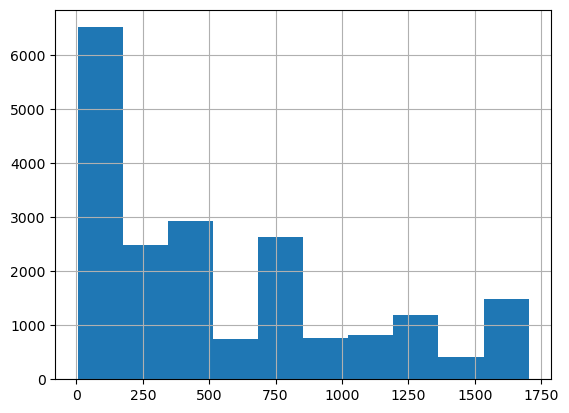

In [179]:
bike_df['profit'].hist()

<Axes: >

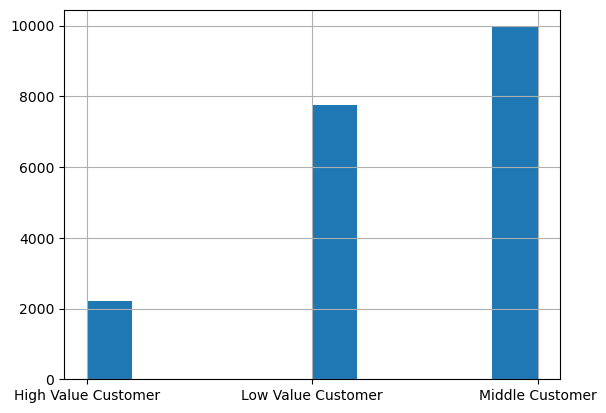

In [130]:
bike_df['Segment'].hist()

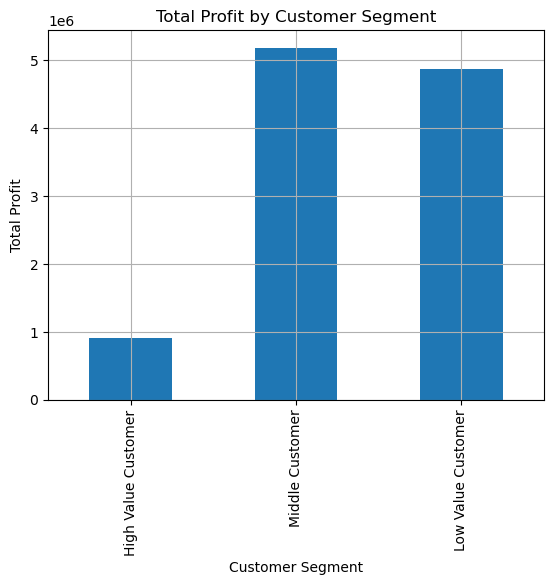

In [182]:
bike_df.groupby('Segment')['profit'].sum().plot(kind='bar')
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


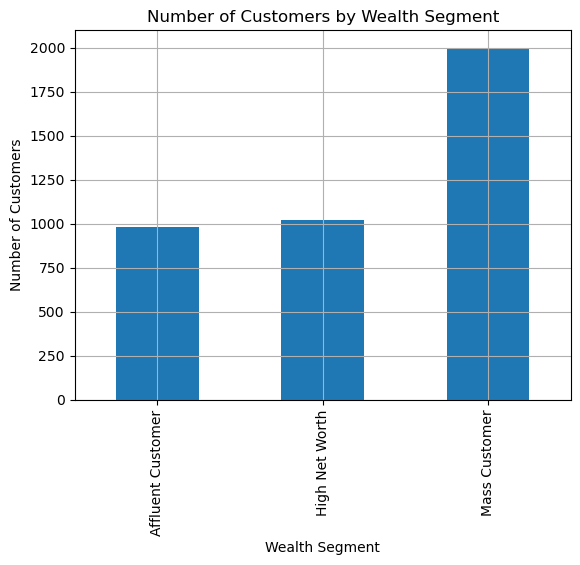

In [183]:
bike_df.groupby('wealth_segment')['customer_id'].nunique().plot(kind='bar')
plt.title('Number of Customers by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


/var/folders/t3/zzjb29hx2qv6z9yl0rs0cpz80000gn/T/ipykernel_84244/2211644599.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


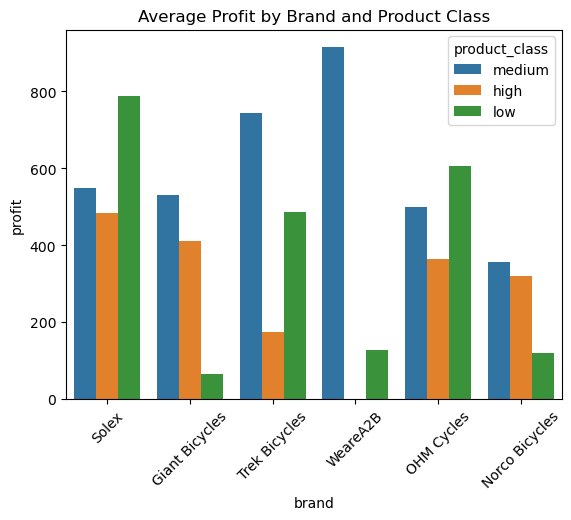

In [184]:
sns.barplot(
    x='brand',
    y='profit',
    hue='product_class',  
    data=bike_df,
    ci=None,
    estimator='mean'
)
plt.xticks(rotation=45)
plt.title('Average Profit by Brand and Product Class')
plt.show()



/var/folders/t3/zzjb29hx2qv6z9yl0rs0cpz80000gn/T/ipykernel_84244/3777247299.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand',y='profit',hue='product_line',data=bike_df,ci=None,estimator='count')


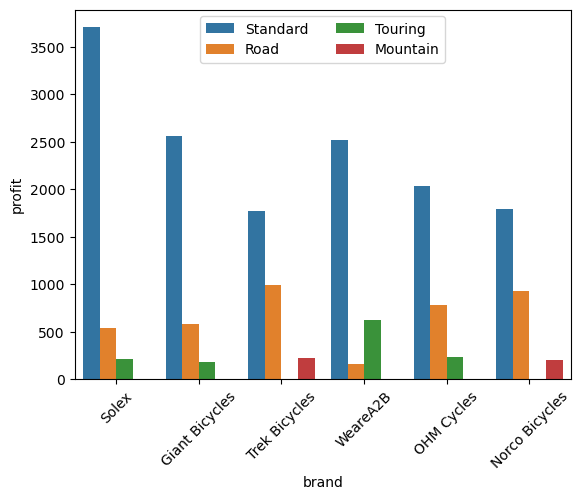

In [187]:
sns.barplot(x='brand',y='profit',hue='product_line',data=bike_df,ci=None,estimator='count')
plt.xticks(rotation=45)
plt.legend(loc='upper center',ncol=2)
plt.show()
# brand profit, age, gender, rfmlable, jobindustry state...

In [149]:
index2=(bike_df['CohortMonth'] == '2024-07-01') & (bike_df['CohortIndex'] == 2)
sub_dataset3 = bike_df[index2]
sub_dataset3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Average_score,Segment
1658,268.0,68.0,1516,2024-08-27,0.0,Approved,OHM Cycles,Standard,medium,medium,...,N,No,11.0,4517 Colorado Place,2210.0,NSW,Australia,10.0,2184.666667,Middle Customer
1758,9253.0,95.0,2147,2024-08-27,1.0,Approved,OHM Cycles,Touring,low,medium,...,N,Yes,11.0,4559 Sundown Trail,2148.0,NSW,Australia,8.0,1066.333333,High Value Customer
1769,1069.0,35.0,2302,2024-08-31,1.0,Approved,Trek Bicycles,Standard,low,medium,...,N,Yes,11.0,4 Delaware Terrace,3804.0,VIC,Australia,8.0,1779.666667,Middle Customer
1880,16646.0,28.0,3260,2024-08-28,0.0,Approved,Solex,Road,medium,small,...,N,No,11.0,056 Petterle Drive,4075.0,QLD,Australia,4.0,1857.666667,Middle Customer
2189,11539.0,33.0,1112,2024-08-29,0.0,Approved,Giant Bicycles,Standard,medium,small,...,N,Yes,11.0,915 Thackeray Junction,2204.0,NSW,Australia,11.0,1564.666667,Middle Customer


In [170]:
sub_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1658 to 19957
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       52 non-null     float64 
 1   product_id                           52 non-null     float64 
 2   customer_id                          52 non-null     int64   
 3   transaction_date                     52 non-null     object  
 4   online_order                         52 non-null     float64 
 5   order_status                         52 non-null     object  
 6   brand                                52 non-null     object  
 7   product_line                         52 non-null     object  
 8   product_class                        52 non-null     object  
 9   product_size                         52 non-null     object  
 10  list_price                           52 non-null     float64 
 11  standard_cost  

In [169]:
index3=(bike_df['CohortMonth'] == '2024-07-01') & (bike_df['CohortIndex'] == 3)
sub_dataset4 = bike_df[index3]
sub_dataset4.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Average_score,Segment
641,1933.0,89.0,119,2024-09-08,0.0,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,11.0,5814 Bunker Hill Street,3070.0,VIC,Australia,7.0,1861.333333,Middle Customer
2188,364.0,32.0,1112,2024-09-13,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,11.0,915 Thackeray Junction,2204.0,NSW,Australia,11.0,1564.666667,Middle Customer
3497,584.0,43.0,1019,2024-09-13,1.0,Cancelled,Solex,Standard,medium,medium,...,N,Yes,11.0,711 Sachtjen Point,2540.0,NSW,Australia,8.0,1899.000000,Middle Customer
3657,1265.0,49.0,375,2024-09-30,0.0,Approved,Trek Bicycles,Road,medium,medium,...,N,Yes,11.0,953 Eliot Crossing,2166.0,NSW,Australia,9.0,1497.666667,High Value Customer
3659,3771.0,60.0,375,2024-09-30,0.0,Approved,Giant Bicycles,Standard,high,small,...,N,Yes,11.0,953 Eliot Crossing,2166.0,NSW,Australia,9.0,1497.666667,High Value Customer


In [171]:
sub_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 641 to 19770
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       28 non-null     float64 
 1   product_id                           28 non-null     float64 
 2   customer_id                          28 non-null     int64   
 3   transaction_date                     28 non-null     object  
 4   online_order                         28 non-null     float64 
 5   order_status                         28 non-null     object  
 6   brand                                28 non-null     object  
 7   product_line                         28 non-null     object  
 8   product_class                        28 non-null     object  
 9   product_size                         28 non-null     object  
 10  list_price                           28 non-null     float64 
 11  standard_cost   

In [173]:
#cohort 52.5
sub_dataset3_high = sub_dataset3 [sub_dataset3['Segment'] == 'High Value Customer']
sub_dataset3_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1758 to 19922
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       19 non-null     float64 
 1   product_id                           19 non-null     float64 
 2   customer_id                          19 non-null     int64   
 3   transaction_date                     19 non-null     object  
 4   online_order                         19 non-null     float64 
 5   order_status                         19 non-null     object  
 6   brand                                19 non-null     object  
 7   product_line                         19 non-null     object  
 8   product_class                        19 non-null     object  
 9   product_size                         19 non-null     object  
 10  list_price                           19 non-null     float64 
 11  standard_cost  

In [174]:
#cohort 28.8
sub_dataset4_high = sub_dataset4 [sub_dataset4['Segment'] == 'High Value Customer']
sub_dataset4_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 3657 to 19770
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       9 non-null      float64 
 1   product_id                           9 non-null      float64 
 2   customer_id                          9 non-null      int64   
 3   transaction_date                     9 non-null      object  
 4   online_order                         9 non-null      float64 
 5   order_status                         9 non-null      object  
 6   brand                                9 non-null      object  
 7   product_line                         9 non-null      object  
 8   product_class                        9 non-null      object  
 9   product_size                         9 non-null      object  
 10  list_price                           9 non-null      float64 
 11  standard_cost   

In [176]:
#cohort 52.5
sub_dataset3_low = sub_dataset3 [sub_dataset3['Segment'] == 'High Value Customer']
sub_dataset3_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1758 to 19922
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       19 non-null     float64 
 1   product_id                           19 non-null     float64 
 2   customer_id                          19 non-null     int64   
 3   transaction_date                     19 non-null     object  
 4   online_order                         19 non-null     float64 
 5   order_status                         19 non-null     object  
 6   brand                                19 non-null     object  
 7   product_line                         19 non-null     object  
 8   product_class                        19 non-null     object  
 9   product_size                         19 non-null     object  
 10  list_price                           19 non-null     float64 
 11  standard_cost  

In [177]:
#cohort 28.8
sub_dataset4_low = sub_dataset4 [sub_dataset4['Segment'] == 'Low Value Customer']
sub_dataset4_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 13946 to 13949
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       2 non-null      float64 
 1   product_id                           2 non-null      float64 
 2   customer_id                          2 non-null      int64   
 3   transaction_date                     2 non-null      object  
 4   online_order                         2 non-null      float64 
 5   order_status                         2 non-null      object  
 6   brand                                2 non-null      object  
 7   product_line                         2 non-null      object  
 8   product_class                        2 non-null      object  
 9   product_size                         2 non-null      object  
 10  list_price                           2 non-null      float64 
 11  standard_cost  

In [178]:
sub_dataset4_middle = sub_dataset4 [sub_dataset4['Segment'] == 'Middle Customer']
sub_dataset4_middle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 641 to 19072
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction_id                       17 non-null     float64 
 1   product_id                           17 non-null     float64 
 2   customer_id                          17 non-null     int64   
 3   transaction_date                     17 non-null     object  
 4   online_order                         17 non-null     float64 
 5   order_status                         17 non-null     object  
 6   brand                                17 non-null     object  
 7   product_line                         17 non-null     object  
 8   product_class                        17 non-null     object  
 9   product_size                         17 non-null     object  
 10  list_price                           17 non-null     float64 
 11  standard_cost   

In [ ]:
#EDA